In [1]:
import numpy as np
from scipy.fft import fft, ifft
# compare fun_S_old and  : plot it
from scipy.signal import deconvolve, convolve
import sys 
sys.path.append('codes')
import matplotlib.pyplot as plt
import MyFunctions as mf
# fun_S_old(x,y,c,A,Gamma,Delta,T)

def deconvoluted_fun(x, convoluted_values):
    """
    Attempt to deconvolute the given convoluted data using a Gaussian function

    Keyword arguments:
    -----------------------------------------
    - (array) | x: the input x values
    - (array) | convoluted_values: the values obtained after convolution
    - (float) | res: the FWHM of the Gaussian function used in convolution

    return:
    - (array) | y: an attempt at returning the deconvoluted function values
    """
    # Generate a range for the Gaussian, similar to the convolution process
    res = 22.5
    x_left = min(x)
    x_right = max(x)
    x_center = (x_right + x_left) / 2
    x_gaussian = np.linspace(x_left - x_center, x_right - x_center, len(x))
    
    # Gaussian function as used in the convolution
    gaussian_curve = mf.fun_gaussian(x_gaussian, 0, 1, res)
    
    # Fourier transform of the convoluted values and the Gaussian
    fft_convoluted = fft(convoluted_values)
    fft_gaussian = fft(gaussian_curve)
    
    # Prevent division by very small numbers
    fft_gaussian[fft_gaussian < 1e-6] = 1e-6
    
    # Deconvolution in the frequency domain
    fft_deconvoluted = fft_convoluted / fft_gaussian
    
    # Inverse Fourier transform to get back to time domain
    deconvoluted_values = ifft(fft_deconvoluted).real
    
    # Normalize if necessary, depending on your data and use case
    return deconvoluted_values


In [9]:



C = 10**(-6)
L = 35*10**(-3)
omega = 1/np.sqrt(C*L)
frequency = omega / (2*np.pi)

print('using omega gives  ' + str(np.arctan(1/12 * (1/(omega*C) - omega*L))*180/np.pi)+' degrees')
print('using frequency gives  ' + str(np.arctan(1/12 * (1/(frequency*C) - frequency*L))*180/np.pi)+ ' degrees')

using omega gives  0.0 degrees
using frequency gives  89.39990965340137 degrees


NameError: name 'n' is not defined

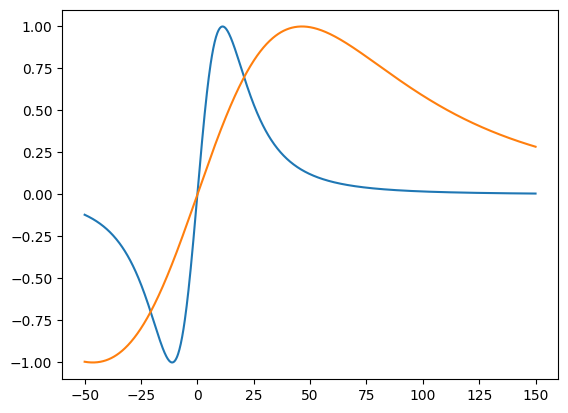

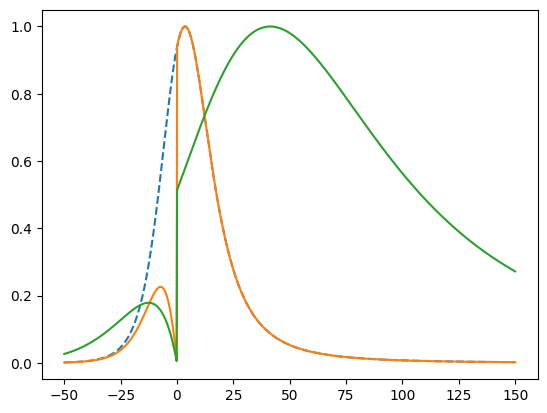

In [3]:


def bose(y,T):
    out = (1+n(y,T))
    out[y<0] = -n(y[y<0],T)
    return out/5

x,c,A,Gamma,Delta,T = [0.24,100,1,18,5,14]
y = np.linspace(-50,150,1000)

plt.figure()
plt.plot(y,mf.fun_chi(y,x,c,A,Gamma,Delta),label='chi')
plt.plot(y,mf.fun_chi(y,x,c,A,80,Delta),label='chi')



plt.figure()
z_old = mf.fun_S_old(y,x,c,A,Gamma,Delta,T)
z_new = mf.fun_S_new(y,x,c,A,Gamma,Delta,T)
plt.plot(y,z_old,label='old', linestyle='--')
plt.plot(y,z_new,label='new')
plt.plot(y,mf.fun_S_new(y,x,c,A,80,Delta,T),label='new, Gamma =100')
plt.plot(y,bose(y,T),label='n(y,T)',color='gray',alpha=0.3)
plt.legend()
plt.ylim(0,1.1)

plt.figure()
plt.plot(y,mf.fun_S_convoluted_old(y,x,c,A,Gamma,Delta,T),label='old', linestyle='--')
plt.plot(y,mf.fun_S_convoluted_new(y,x,c,A,Gamma,Delta,T),label='new')
plt.plot(y,mf.fun_S_convoluted_new(y,x,c,A,80,Delta,T),label='new, Gamma =100')
plt.plot(y,bose(y,T),label='n(y,T)',color='gray',alpha=0.3)
plt.ylim(0,1.1)

plt.legend()

In [ ]:
print(np.shape(y_conv),np.shape(x_gaussian),np.shape(y_expand))

(1999,) (1000,) (1999,)


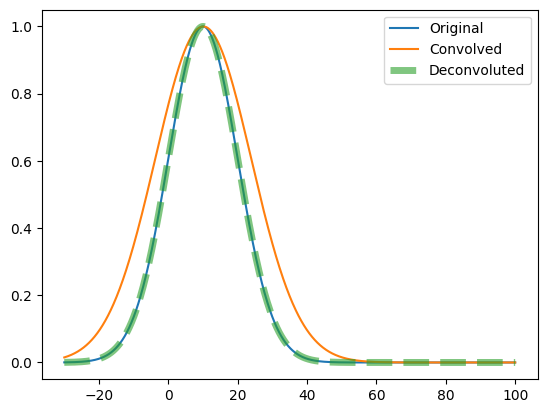

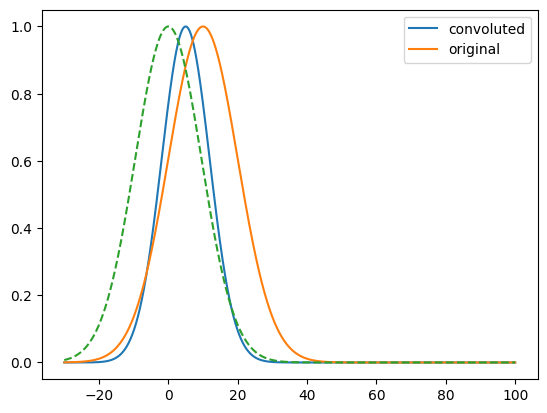

In [ ]:
# test deconvolution
x = np.linspace(-30,100,1000)
y = np.exp(-0.5*(x-10)**2/10**2)


x_left = min(x)
x_right = max(x)
x_left_shifted = x_left - (x_right + x_left)/2
x_right_shifted = x_right - (x_right + x_left)/2
x_gaussian = np.linspace(x_left_shifted, x_right_shifted, len(x))
gaussian_curve = mf.fun_gaussian(x_gaussian, 0, 1, 22.5)
gaussian_for_deconvolve = mf.fun_gaussian(x, 0, 1, 22.5)
const = np.ones(len(x))


y_expand = convolve(y, const)

y = y / np.max(y)

y_conv = convolve(y, gaussian_for_deconvolve)
y_conv = y_conv / np.max(y_conv)
y_conv_same = convolve(y, gaussian_curve, mode='same')
y_conv_same = y_conv_same / np.max(y_conv_same)
y_deconv, remainder = deconvolve(y_conv, gaussian_for_deconvolve)
y_deconv = y_deconv / np.max(y_deconv)

plt.figure()
plt.plot(x, y, label='Original')
plt.plot(x, y_conv_same, label='Convolved')
plt.plot(x, y_deconv, label='Deconvoluted',alpha=0.6, linestyle='--',linewidth=5)
plt.legend()

plt.figure()
plt.plot(np.linspace(min(x),max(x),len(y_conv)),y_conv,label='convoluted')
plt.plot(x,y,label='original')
plt.plot(x,gaussian_for_deconvolve,'--')
plt.legend()

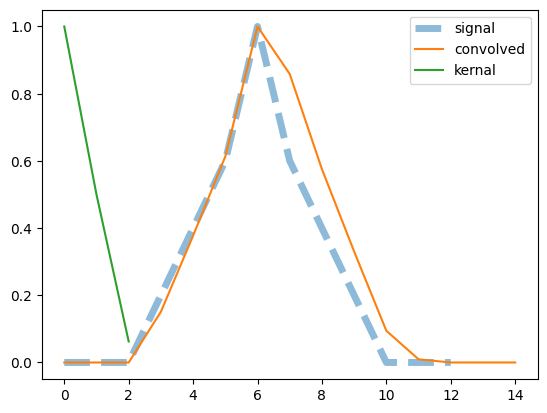

In [ ]:
signal = [0,0,0,1,2,3,5,3,2,1,0,0,0]
signal = signal/np.max(signal)
kernal = mf.fun_gaussian(np.array([0,1,2]),0,1,2)
recorded = convolve(signal,kernal); recorded = recorded/np.max(recorded)

plt.plot(signal,label='signal',linestyle='--',linewidth=5,alpha=0.5)
plt.plot(recorded,label='convolved')
plt.plot(kernal,label='kernal')
plt.legend()

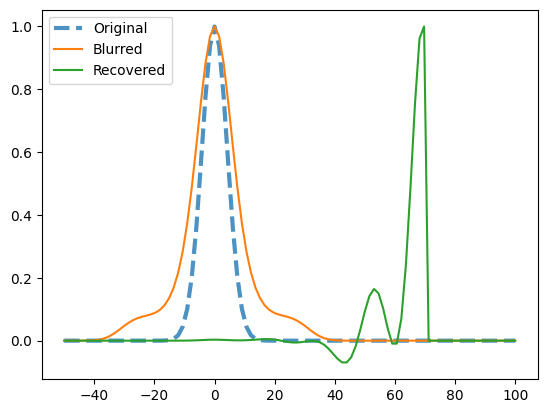

In [6]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import wiener



x = np.linspace(-50,100,100)
x_gaussian = np.linspace(-50,50,41)

# Your signal (for example, a 1D array)
signal = mf.fun_gaussian(x, 0, 1, 10)

# Standard deviation of the Gaussian kernel
FWHM = 13
filter = mf.fun_gaussian(x_gaussian, 0, 1, FWHM)
filter[filter< 0.05] = 0.05

filter_2 = mf.fun_lorentzian(x_gaussian, 0, 1, FWHM)
filter_2[filter_2< 0.05] = 0.05


# Apply Gaussian filter (convolution with a Gaussian)
blurred_signal = convolve(signal, filter_2, mode='same')

#normalized
signal = signal / np.max(signal)
blurred_signal = blurred_signal / np.max(blurred_signal)
ratio = 0
blurred_signal[32] = blurred_signal[32]*1+(ratio)/100
recovered_signal,_ = deconvolve(blurred_signal, filter)
recovered_signal = recovered_signal / np.max(recovered_signal)

n = len(signal) - len(x_gaussian) 
s = int((len(signal)-n)/2)

box = np.zeros(len(blurred_signal))
box[s:len(signal)-s] = recovered_signal

plt.figure()
plt.plot(x, signal, label='Original', linestyle='--', linewidth=3, alpha=0.8)
plt.plot(x, blurred_signal, label='Blurred')
plt.plot(x, box, label='Recovered')

plt.legend()



TypeError: float() argument must be a string or a real number, not 'type'

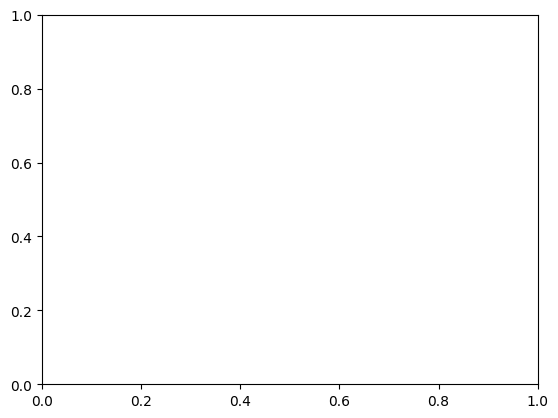

In [ ]:
plt.plot(filter)
plt.plot(signal,label='signal',linestyle='--',linewidth=5,alpha=0.5)
plt.plot(blurred_signal)
plt.plot(box)